📂 Please upload the 'website_traffic_data.csv' file.


Saving website_traffic_data.csv to website_traffic_data.csv

📊 Website Traffic Analysis:
✅ Unique Visitors: 250

🔥 Top 5 Most Visited Pages:
 Page
/contact     190
/services    171
/home        170
/about       165
/products    164
Name: count, dtype: int64

🌍 Top 5 Traffic Sources:
 Referrer
linkedin.com    206
direct          204
facebook.com    200
twitter.com     198
google.com      192
Name: count, dtype: int64

🚦 HTTP Response Code Distribution:
 Response_Code
302    267
500    254
404    253
200    226
Name: count, dtype: int64


<ipython-input-1-115cede6cda5>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Page'].value_counts().index, y=df['Page'].value_counts().values, palette="viridis")


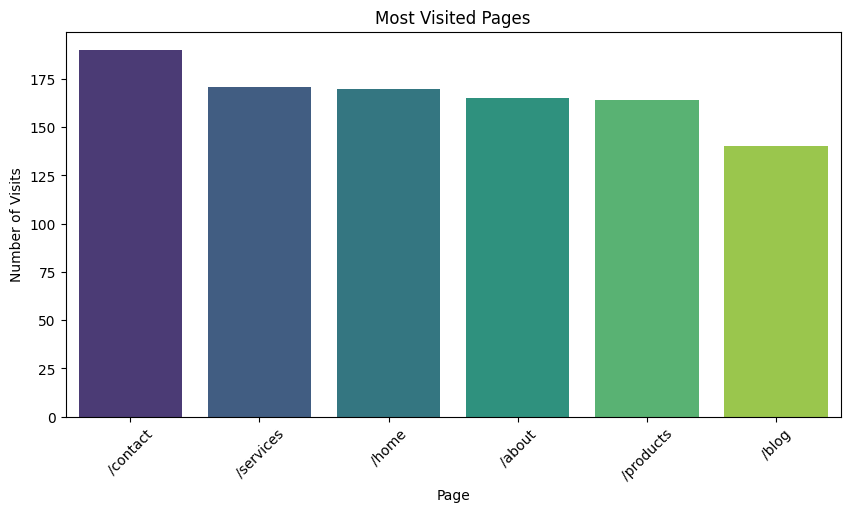

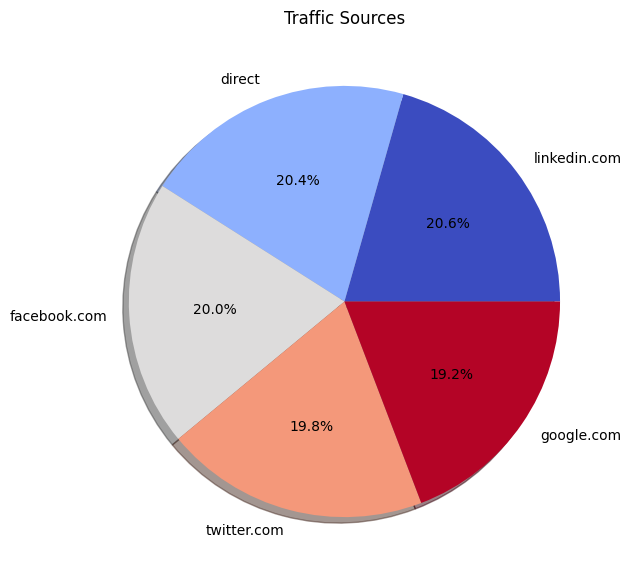

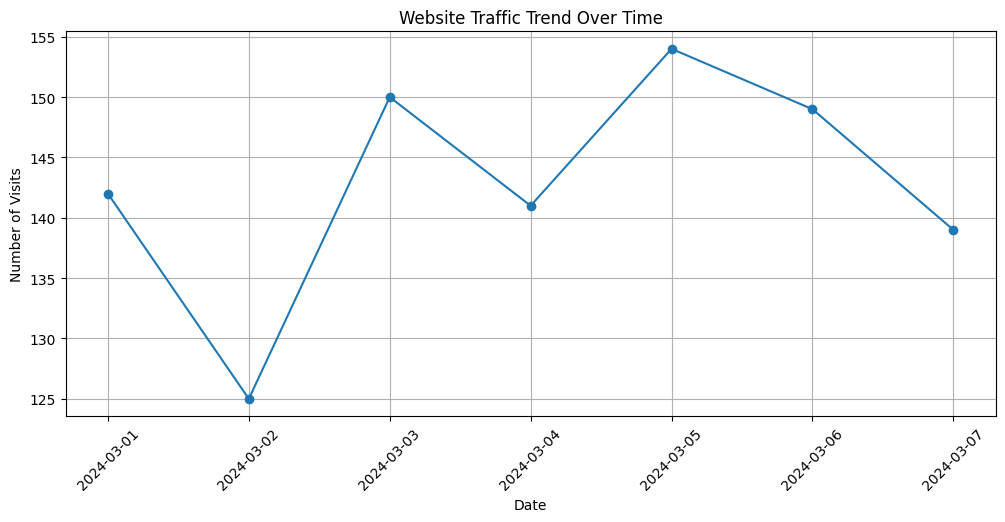

<ipython-input-1-115cede6cda5>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Response_Code'].value_counts().index, y=df['Response_Code'].value_counts().values, palette="magma")


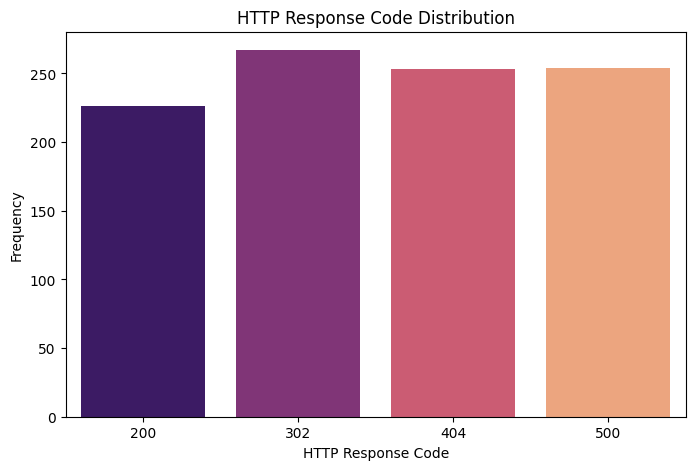

In [1]:
# Step 1: Install and Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 2: Ask User to Upload CSV File
print("📂 Please upload the 'website_traffic_data.csv' file.")
uploaded = files.upload()

# Step 3: Read the uploaded CSV file
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name)

# Step 4: Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Step 5: Data Analysis
print("\n📊 Website Traffic Analysis:")
print(f"✅ Unique Visitors: {df['IP'].nunique()}")
print("\n🔥 Top 5 Most Visited Pages:\n", df['Page'].value_counts().head(5))
print("\n🌍 Top 5 Traffic Sources:\n", df['Referrer'].value_counts().head(5))
print("\n🚦 HTTP Response Code Distribution:\n", df['Response_Code'].value_counts())

# Step 6: Data Visualization

# 🔹 Bar Chart - Most Visited Pages
plt.figure(figsize=(10,5))
sns.barplot(x=df['Page'].value_counts().index, y=df['Page'].value_counts().values, palette="viridis")
plt.xlabel("Page")
plt.ylabel("Number of Visits")
plt.title("Most Visited Pages")
plt.xticks(rotation=45)
plt.show()

# 🔹 Pie Chart - Traffic Sources
plt.figure(figsize=(7,7))
df['Referrer'].value_counts().plot.pie(autopct='%1.1f%%', cmap="coolwarm", shadow=True)
plt.title("Traffic Sources")
plt.ylabel("")  # Hide ylabel
plt.show()

# 🔹 Line Chart - Traffic Trends Over Time
df.set_index('Timestamp', inplace=True)
df['Visits'] = 1  # Add a column for counting visits
traffic_trend = df.resample('D').count()  # Aggregate by day
plt.figure(figsize=(12,5))
plt.plot(traffic_trend.index, traffic_trend['Visits'], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.title("Website Traffic Trend Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 🔹 Bar Chart - HTTP Response Codes
plt.figure(figsize=(8,5))
sns.barplot(x=df['Response_Code'].value_counts().index, y=df['Response_Code'].value_counts().values, palette="magma")
plt.xlabel("HTTP Response Code")
plt.ylabel("Frequency")
plt.title("HTTP Response Code Distribution")
plt.show()
